# Assignment 4

This assignment covers material on numerical integration.

The breakdown of the marks is as follows:

Question 0 - [1 mark]  
Question 1 - [4 marks]  
Questino 2 - [5 marks]  
Question 3 - [5 marks]  
Question 4 - [5 marks]  
Question 5 - [5 marks]  
Question 6 - [5 marks]  

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1

In this question you will be asked to evaluate definite integrals in the form:

$$ \int_a^b f(x)\, dx$$ 

using Simpson's rule. You can copy code from the [examples repository](https://github.com/nielsw2/ACM20030-Examples) if you wish but if you do, remove all the plotting functionality. Do not use SciPy or any other library to evaluate the integrals, unless explicitly asked to do so.

First write a function that integrates another function using Simpson's rule. This function will get used in multiple questions in this assignment.

In [3]:
def SimpsonsIntegrate(f, a, b, N):
    dx = (b-a)/N #Width of intervals
    xi = a
    area = 0
    i = 0
    while i < N:
        xi1 = xi + (dx/2)
        xi2 = xi + dx
        area += (dx/6)*(f(xi) + 4*f(xi1) + f(xi2))
        xi += dx
        i += 1
       
    return area

## Q1 a

Evaluate $$ \frac{1}{\sqrt{\pi}}\int^{15}_{-15} x^2 e^{-x^2}\, dx$$

Use enough strips so that the result is accurate to a relative error of of at least 1e-6. Hint: to within machine precision the above integral evaluates to  1/2 .

In [24]:
def fa(x):
    return (x**2)*(np.exp(-(x**2)))

# Evaluate Integration
(1/np.sqrt(np.pi))*SimpsonsIntegrate(fa,-15,15,40)

0.5000002725305649

## Q1 b

Evaluate

$$\int^{50}_{-50} \frac{1}{\cosh x}\,dx $$

Use enough strips so that the result is accurate to a relative error of  of at least `1e-6`. Hint: to within machine precision the above integral evaluates to $\pi$.

In [25]:
def fb(x):
    return 1/np.cosh(x)

SimpsonsIntegrate(fb, -50, 50, 160)

3.141592072845621

## Q1 c

Use SciPy's `integrate.quad()` function to evaluate the integrals in Q1a and Q1b

In [26]:
(1/np.sqrt(np.pi))*integrate.quad(fa, -15, 15)[0] #Result is 1st value of the output array

0.49999999999999994

In [27]:
integrate.quad(fb, -50, 50)[0]

3.141592653589793

Now commit your notebook to your git repository and push the changes to GitHub.

# Question 2 - improper integrals

In the lectures we looked at numerically evaluating indefinite integrals of the form

$$ \int^b_a f(x)\, dx$$ where $a,b$ are finite. What about improper integrals where either $a$, $b$ or both are infinite? The methods we know so far cannot immediately be applied to these cases.

One method is to transform the integral using the result

$$ \int_a^b f(x)\, dx = \int^{1/a}_{1/b} t^{-2} f(t^{-1})\, dt$$

which holds so long as $a,b>0$.

## Q2 a

Using the above result numerically evaluate the following integral

$$ \int^\infty_1 \frac{\log(x)}{x^3}\,dx $$

using Simpson's rule. Use 100 strips to evaluate the integral.

Hint: you will have to use an `if` statement inside your transformed function for to deal with $t=0$. For this case it is useful to note that $\lim_{t\rightarrow0} t \log(1/t) = 0$.

In [31]:
def InfiniteSimpsonsUpwards(f, a, N):
    
    #Re-define Limits, a = 1/Infinity = 0
    b = 1/a
    a = 0
    
    #Re-define integral in suggested form
    def t(x):
        return (x**-2)*f(1/x)
    
    # Almost exact same as simpsons method with an added if statement
    dx = (b-a)/N
    xi = a
    area = 0
    i = 0
    while i < N:
        #Skip t = 0, we can do this because the limit of this integral is 0, hence, nothing additional is added to area
        if xi == 0:
            xi += dx
            i += 1
        xi1 = xi + (dx/2)
        xi2 = xi + dx
        area += (dx/6)*(t(xi) + 4*t(xi1) + t(xi2))
        xi += dx
        i += 1
       
    return area

In [32]:
def f(x):
    return np.log(x)/x**3

InfiniteSimpsonsUpwards(f, 1, 100)

0.24974471117931912

## Q2 b

Numerically evaluate

$$ \int^\infty_0 \frac{1}{(x+1)^3}\,dx$$

using Simpson's rule.

Hint: break the integral into two integrals, one with a finite domain and one with an infinite domain. In each domain use 100 strips to evalute the integral. Check your answer against the analytic result.

In [37]:
def f(x):
    return 1/(x+1)**3

# Finite domain from 0 to 1
Finite = SimpsonsIntegrate(f, 0, 1, 100)

# Infinite domain from 1 to Infinity
Infinite = InfiniteSimpsonsUpwards(f, 1, 100)

#Output sum of both integrals
Finite + Infinite

0.49995098528627907

Now commit your notebook to your git repository and push the changes to GitHub.

# Question 3 - Boole's rule

Fitting the integrand to a quintic polynomial results in Boole's rule for integration. In the lecture the formula for Boole's rule was given as

$$ \int^b_a f(x)\,dx \simeq \frac{2 \Delta x}{45}\left(7f_0 + 32 f_1 + 12 f_2 +32f_3 + 7 f_4\right) $$

where $\Delta x = (b-a)/4$, and $f_i = f(a + i\Delta x)$.

## Q3 a

Write a function that numerically integrates another function using Boole's rule. Use the following function definition:

In [42]:
def BooleIntegrate(f, a, b, N):
    
    dx = (b-a)/N
    xi = a
    area = 0
    
    i = 0
    while i < N:
        f0 = f(xi)
        f1 = f(xi + dx/4)
        f2 = f(xi + dx/2)
        f3 = f(xi + 3*dx/4)
        f4 = f(xi + dx)
        area += (dx/90)*(7*f0 + 32*f1 + 12*f2 + 32*f3 + 7*f4)
        xi += dx
        i += 1
       
    return area

Test your function by evaluating the following using 100 strips.

$$ \int_0^\pi \sin(x)\,dx $$

In [128]:
def f(x):
    return np.sin(x)

BooleIntegrate(f, 0, np.pi, 100)

2.0000000000000004

## Q3 b

For Boole's rule show that the global error scales as $\Delta x^6$. The below plot shows a $\Delta x^6$ reference line.

In [155]:
I = 2
imax = 7

ErrorBoole = np.empty((imax,2));

i = 0
N = 10
while i < imax:
    ErrorBoole[i,0] = N
    ErrorBoole[i,1] = np.abs(BooleIntegrate(f, 0, np.pi, N) - I)
    
    N *= 2
    i += 1

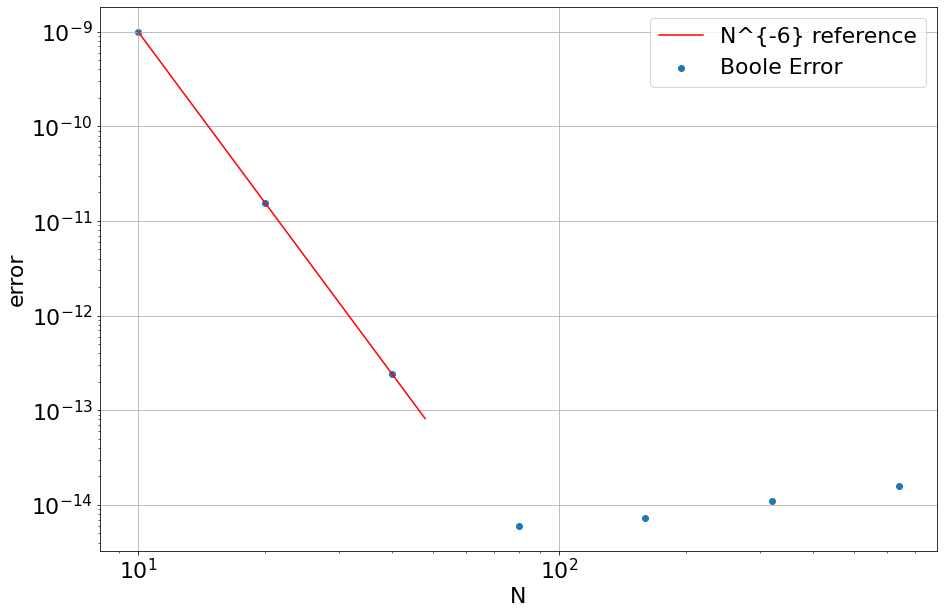

In [156]:
x = np.linspace(10,48,100)
y = 0.001*x**-6 #Change co-efficient to show slope is equal

plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('error')
plt.scatter(ErrorBoole[:,0], ErrorBoole[:,1])
plt.plot(x,y, color = 'r')
plt.legend(['N^{-6} reference','Boole Error']);

Now commit your notebook to your git repository and push the changes to GitHub.

# Question 4 - integrand with a singularity

The techniques developed in the lecture require the integrand to be continuous and bounded. What happens if there is a singularity in the integrand? In general these can be difficult to deal with (though some more generic methods exist - see, e.g., [Tanh-sinh quadrature](https://en.wikipedia.org/wiki/Tanh-sinh_quadrature)).

In this example we will look at an explicit example that can be dealt with by a change of variables. Consider the identity:

$$ \int_0^1 \frac{f(x)}{x^\alpha}\, dx = \frac{1}{\alpha} \int_0^1 f(t^{1/\alpha}) t^{(1-2\alpha)/\alpha}\,dt$$

which is achived by changing variables using $t = x^\alpha$. This identity holds when $0 < \alpha < 1$ and $f(x)$ is continous on $[0,1]$.

Let
$$I = \int^1_0 \frac{\cos(10x)}{x^{1/2}}\,dx $$

Plot the integrand in the range $[0,1]$, use a grid and label your axes.

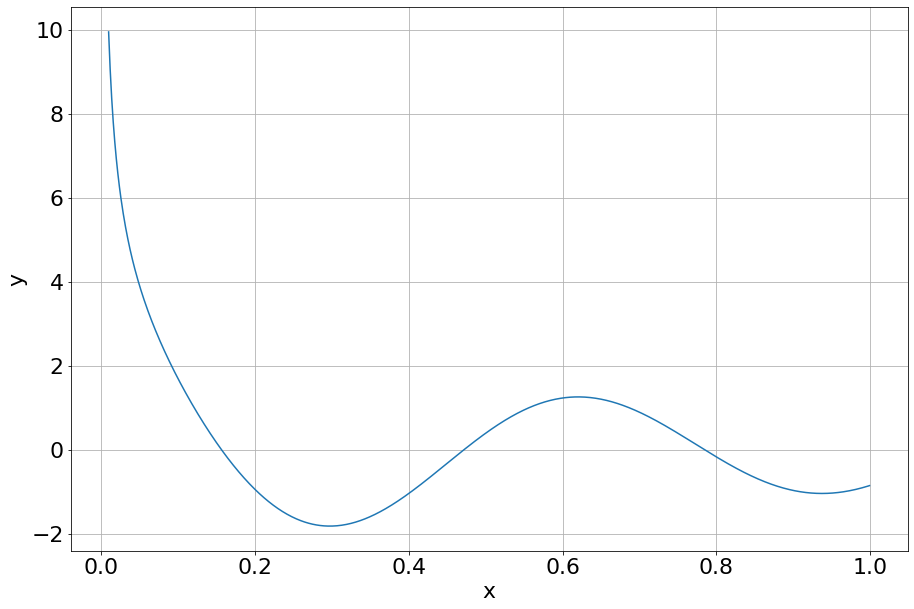

In [194]:
def fI(x):
    return np.cos(10*x)/x**0.5

x = np.arange(0.01,1,0.001) #Must start at 0.01 to avoid division by 0 error
y = fI(x)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y);

Define and plot the transformed integrand. For the plot use a grid and label your axes.

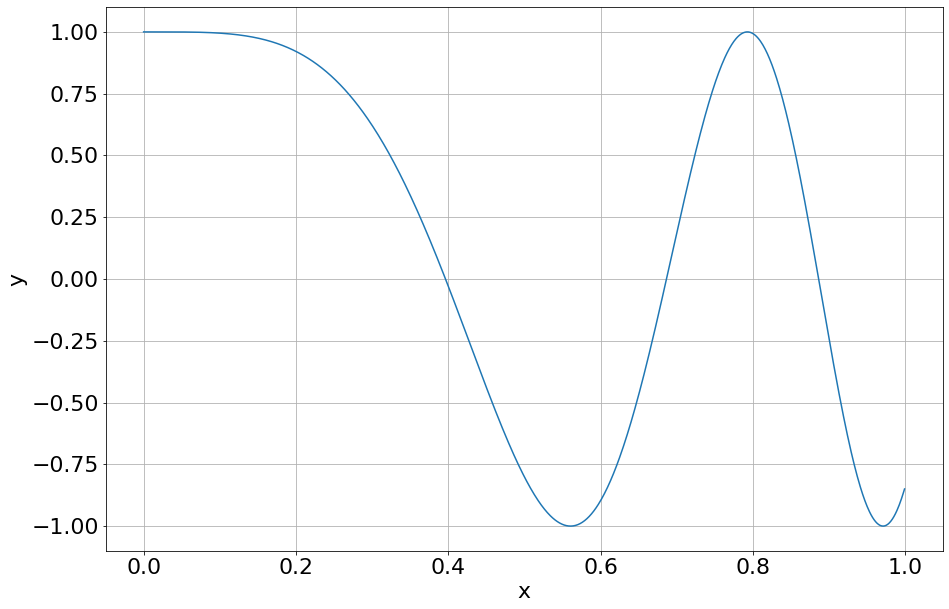

In [172]:
def f(x):
    return np.cos(10*x)

def ft(t):
    return f(t**2)

x = np.arange(0, 1, 0.001)
y = ft(x)

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y);

Numerically evaluate $I$ using Simpson's rule. Use 100 strips to do this.

In [189]:
SimpsonsIntegrate(ft, 0, 1, 100)

0.17318310457322592

Now commit your notebook to your git repository and push the changes to GitHub.

# Question 5

Write your own function to integrate the following data using Simpson's rule.

In [322]:
x = np.linspace(0, np.pi, 101)
dx = x[1]-x[0]
y = np.sin(x)

In [323]:
def SimpsonsIntegrateData(x, dx, y):
    N = len(x) - 1
    area = 0
    i = 0
    while i < N:
        area += (dx/6)*(y[i] + 4*y[i+1] + y[i+2])
        i += 2
        
    return area

Integrate the data using your function

In [324]:
SimpsonsIntegrateData(x, dx, y)

1.000000005412252

Recall that Simpson's method needs and odd number of data points to work (giving an even number of strips). If you use an even number you will get a bad result. If you check the convergence rate in this case you will see it is not what is expected. Checking the convergence rate is an important test of an integration code.

In [327]:
I = 1
imax = 10

ErrorSimpData = np.empty((imax,2));

i = 0
N = 10
while i < imax:
    x = np.linspace(0, np.pi, N+1)
    dx = x[1]-x[0]
    y = np.sin(x)
    
    ErrorSimpData[i,0] = N
    ErrorSimpData[i,1] = np.abs(SimpsonsIntegrateData(x, dx, y) - I)
    
    N *= 2
    i += 1

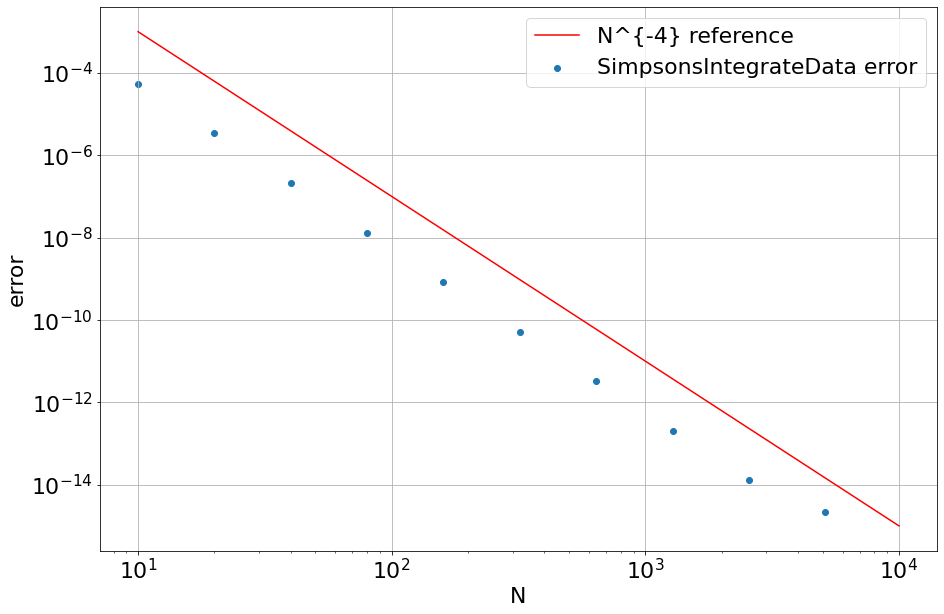

In [328]:
x = np.linspace(10,1e4)
N2ref = 10*x**-4


plt.grid(True)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('error')
plt.scatter(ErrorSimpData[:,0], ErrorSimpData[:,1]);
plt.plot(x,N2ref, color='red')
plt.legend(['N^{-4} reference','SimpsonsIntegrateData error']);

Now commit your notebook to your git repository and push the changes to GitHub.

# Question 6

Evaluate the following integral using both Simpsons rule and an RK4 ODE method

$$ \int_0^5 \sinh(x) (x-5)\, dx $$

Compare the results of the two methods and take sufficient strips/small enough step sizes to ensure the results agree to a relative accuracy of 1e-6.

In [81]:
# Using Simpsons Rule
def f(x):
    return np.sinh(x)*(x-5)

simp = SimpsonsIntegrate(f, 0, 5, 200)
print('Simpsons Integral = %.10f' %simp)

#RK4 ODE Method


Simpsons Integral = -69.2032105469


## Submitting your assignment to BrightSpace

To submit your assignment compress your entire ACM20030-Assignments folder (this will contain this assignment and assignment 1) and uploaded the zip file to BrightSpace. DO NOT download the zip file from the GitHub browser interface.